In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('data/main.csv')
df = df.set_index('Year')
df = df.drop('G/A', axis=1)
df

,Rating
Year,
2009,7.18
2010,7.28
2011,7.61
2012,7.15
2013,7.37
2014,7.56
2015,7.41
2016,7.09
2017,7.10


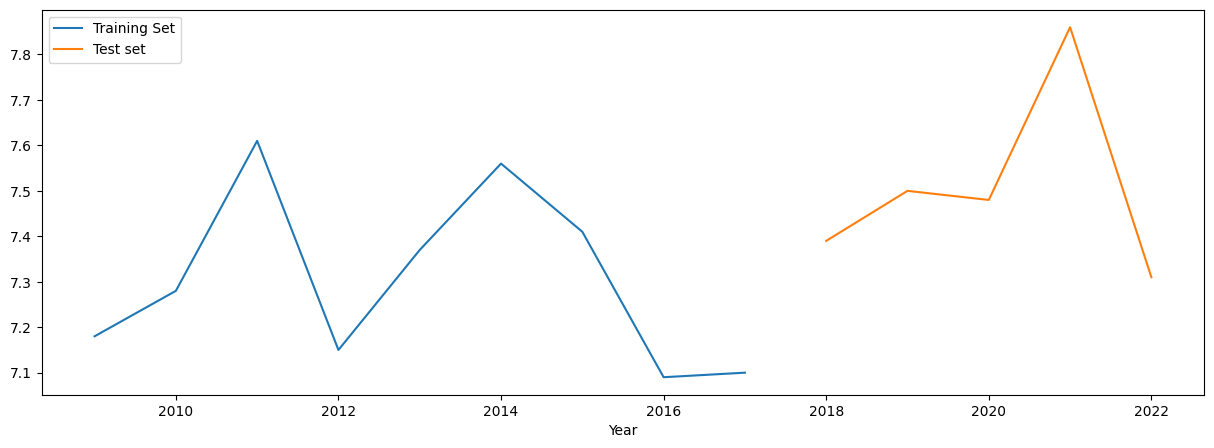

In [3]:
from sklearn.model_selection import train_test_split
train = df.loc[df.index <= 2017]
test = df.loc[df.index > 2017]

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training Set')
test.plot(ax=ax, label='Test Set')
ax.legend(['Training Set', 'Test set'])
plt.show()

In [4]:
X_train = train
y_train = train

X_test = test
y_test = test

In [5]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.001)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:0.18300	validation_1-rmse:0.27660
[100]	validation_0-rmse:0.17058	validation_1-rmse:0.26761


c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

[200]	validation_0-rmse:0.15906	validation_1-rmse:0.25920
[300]	validation_0-rmse:0.14839	validation_1-rmse:0.25134
[400]	validation_0-rmse:0.13849	validation_1-rmse:0.24391
[500]	validation_0-rmse:0.12931	validation_1-rmse:0.23679
[600]	validation_0-rmse:0.12081	validation_1-rmse:0.23012
[700]	validation_0-rmse:0.11294	validation_1-rmse:0.22390
[800]	validation_0-rmse:0.10562	validation_1-rmse:0.21808
[900]	validation_0-rmse:0.09882	validation_1-rmse:0.21265
[999]	validation_0-rmse:0.09255	validation_1-rmse:0.20762


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

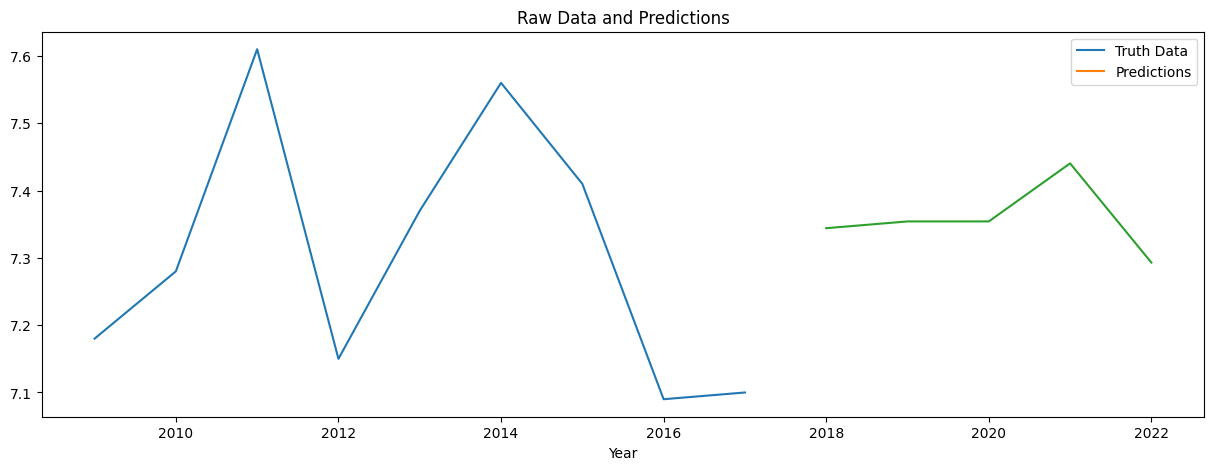

In [6]:
test['prediction']=reg.predict(X_test)
df = df.merge(test['prediction'], how='left', left_index=True, right_index=True)
ax = df[df['Rating'].index <= 2017].plot(figsize=(15,5))
df['prediction'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Predictions')
plt.show()

In [7]:
score = np.sqrt(mean_squared_error(test['Rating'], test['prediction']))
print(f'RMSE Score on test set: {score: 0.2f}')

RMSE Score on test set:  0.21


In [8]:
test['error'] = np.abs(test['Rating'] - test['prediction'])
test.groupby(df.index)['error'].mean().sort_values(ascending=False)

C:\Users\Ryan\AppData\Local\Temp\ipykernel_22044\3249421762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error'] = np.abs(test['Rating'] - test['prediction'])


ValueError: Grouper and axis must be same length

In [ ]:
test